# Relatório de Análise VII

In [41]:
import pandas as pd

In [42]:
dados = pd.read_csv('dados/aluguel_residencial_tratado.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


## Obtendo a média

Uma das primeiras análises necessária para poder entender a variável analisada é a média (`mean()`).

In [43]:
dados['Valor'].mean()

5046.172821405663

Outra função que pode ser utilizada para facilitar esta primeira aproximação é a `describe()`, que fornece a média, desvio padrão, mediana e outras informações.

In [44]:
dados.Valor.describe()

count    2.182600e+04
mean     5.046173e+03
std      3.298854e+04
min      1.000000e+02
25%      1.600000e+03
50%      2.700000e+03
75%      5.500000e+03
max      4.500000e+06
Name: Valor, dtype: float64

## Obtendo a média segundo algumas variáveis (`groupby()`)

Sabe-se que o valor do aluguel depende também da localização. Então a primeira separação para a análise da média do aluguel será por bairros, que pode servir de proxy de localização.

In [45]:
# obtendo a lista de bairros
bairros = dados.Bairro.unique()
# como são muitos, para facilitar a análise, foram separados alguns
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados.Bairro.isin(bairros)
dados_short = dados[selecao]

In [46]:
grupo_bairro = dados_short.groupby('Bairro')
grupo_bairro.groups # é organizado pela chave (bairro) e o id das linhas que tem o mesmo atributo

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

In [47]:
# para testar
for bairro, data in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


Note que os grupos têm o mesmo comportamento de uma tupla. Sendo a primeira parte a variável do agrupamento e a segunda parte o df desse grupo.

In [48]:
# calculando a média para cada bairro
for bairro, data in grupo_bairro:
    print(f'Média do aluguel no bairro {bairro} é {round(data.Valor.mean(),2)} reais')

Média do aluguel no bairro Barra da Tijuca é 7069.55 reais
Média do aluguel no bairro Botafogo é 8791.83 reais
Média do aluguel no bairro Copacabana é 4126.68 reais
Média do aluguel no bairro Flamengo é 4113.53 reais
Média do aluguel no bairro Ipanema é 9352.0 reais
Média do aluguel no bairro Leblon é 8746.34 reais
Média do aluguel no bairro Tijuca é 2043.52 reais


In [49]:
# calculando a média e já conseguindo um df - para ser um df, eu preciso passar a variável como lista
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas descritivas

In [50]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [51]:
grupo_bairro['Valor'].describe().round(2).sort_values('std', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


Note que os desvios padrão (**std**) de *Botafogo e Barra da Tijuca* são muito altos. Também é possível ver que os valores mínimos estão muito afastados dos valores máximos para esses bairros.

In [52]:
# a função semelhante ao summarise do R é .aggregate
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [53]:
# é possível renomear as colunas
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Total'})

,Mínimo,Máximo,Total
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


Note que estamos trabalhando com poucos bairros (havíamos feito uma seleção previamente), então é possível fazer a análise apenas com as tabelas produzidas. No entanto, caso quiséssemos trabalhar com toda a base de dados, usar a visualização dos resultados por tabelas seria bem ruim. Para facilitar, podemos visualizá-los graficamente.

### Visualização gráfica com `matplotlib`

In [56]:
# configuração necessária para visualização no jupyter
%matplotlib inline 
# mostra o gráfico estático

import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10)) # definindo o tamanho dos gráficos

Matplotlib is building the font cache; this may take a moment.


In [57]:
grupo_bairro = dados.groupby('Bairro') # para fazer com o bd inteiro

<AxesSubplot:xlabel='Bairro'>

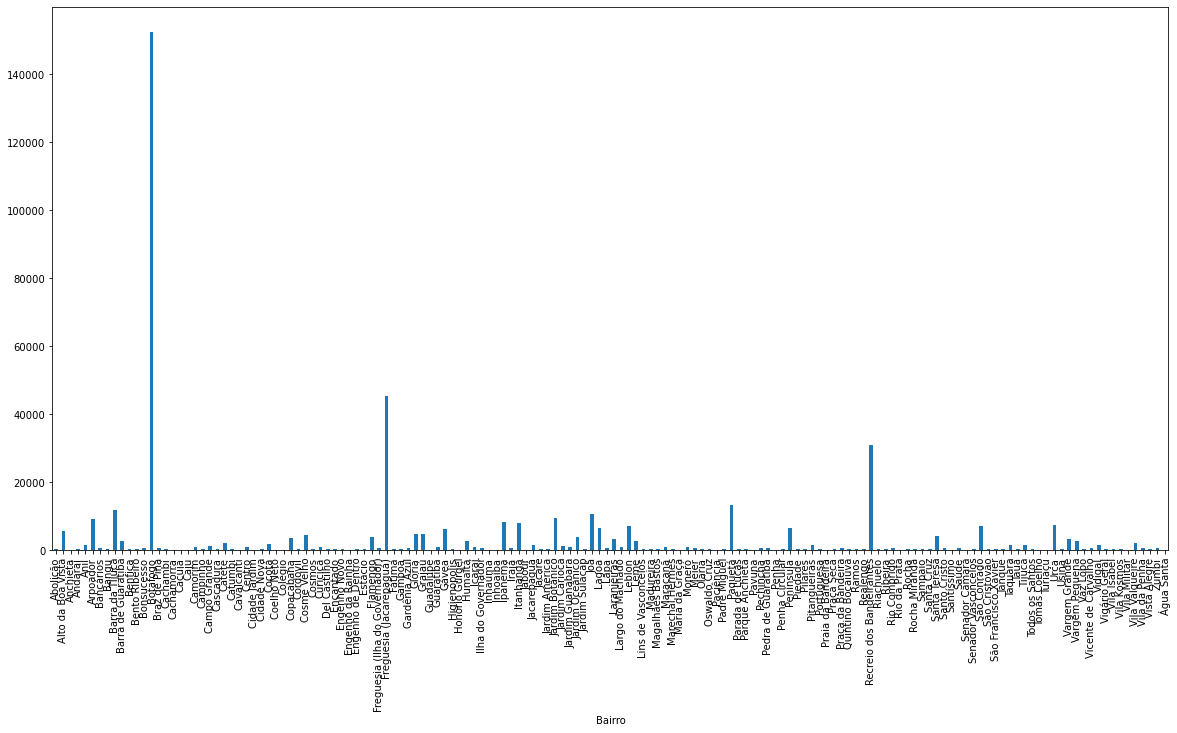

In [58]:
grupo_bairro['Valor'].std().plot.bar()

<AxesSubplot:title={'center':'Desvio padrão do valor do aluguel por Bairro'}, xlabel='Bairro', ylabel='Desvio padrão do valor do aluguel'>

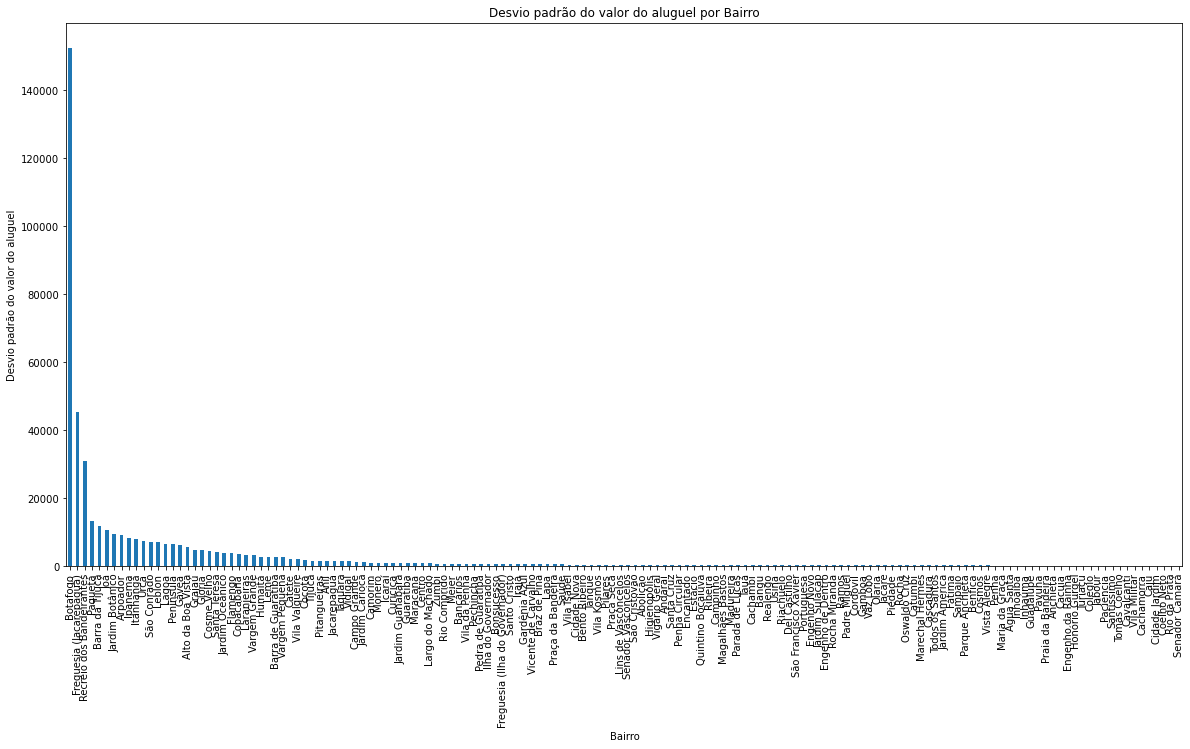

In [63]:
# melhorando a visualização
std_aluguel = grupo_bairro['Valor'].std()
fig = std_aluguel.sort_values(ascending = False).plot.bar()
fig.set_ylabel('Desvio padrão do valor do aluguel')
fig.set_title('Desvio padrão do valor do aluguel por Bairro')
fig

<AxesSubplot:title={'center':'Média do valor do aluguel por Bairro'}, xlabel='Bairro', ylabel='Média do valor do aluguel'>

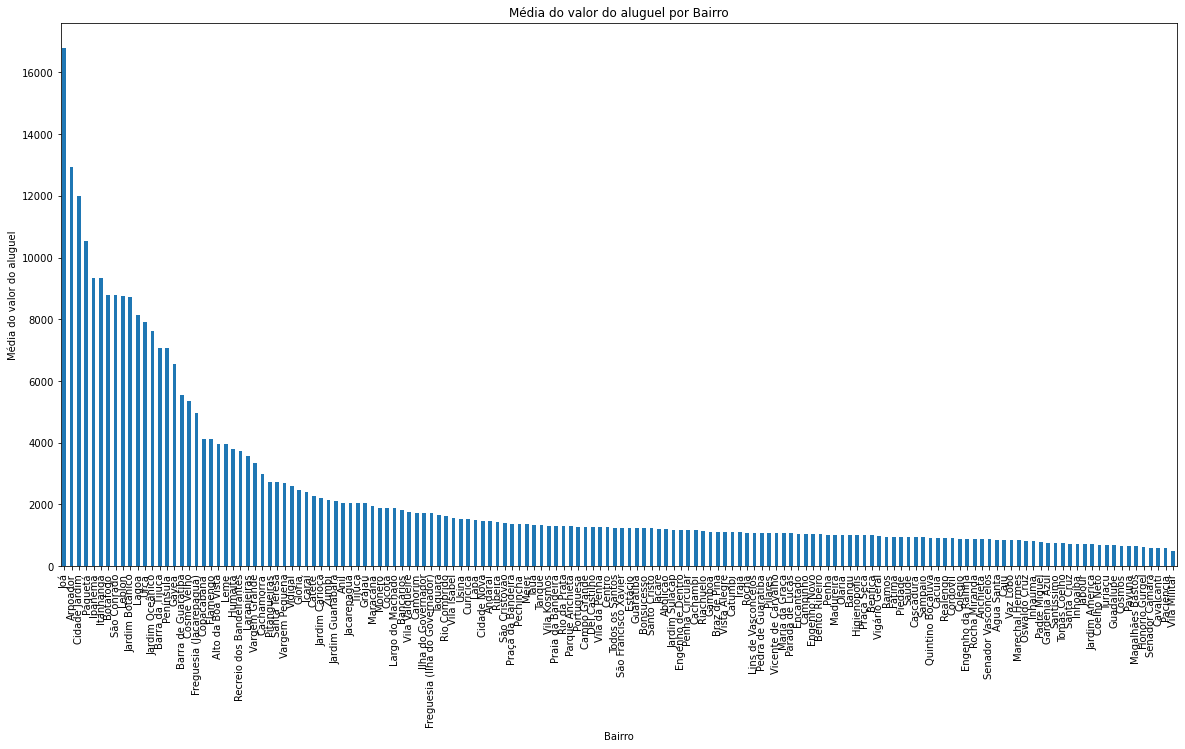

In [64]:
# reproduzindo para a média
mean_aluguel = grupo_bairro['Valor'].mean()
fig = mean_aluguel.sort_values(ascending = False).plot.bar()
fig.set_ylabel('Média do valor do aluguel')
fig.set_title('Média do valor do aluguel por Bairro')
fig

## Extra - criando faixas de valor

In [66]:
dados = pd.read_csv('dados/aluguel.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


Queremos criar classes para variáveis numéricas. No caso de quartos, vamos agrupar:
 * 1 e 2;
 * 3 e 4;
 * 5 e 6;
 * 7 ou mais.

In [67]:
# gerando as classes
classes = [0, 2, 4, 6, 100] # denifindo os limites de cada classe

In [69]:
quartos = pd.cut(dados.Quartos, classes)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2               NaN
3        (0.0, 2.0]
4        (0.0, 2.0]
            ...    
32955           NaN
32956    (2.0, 4.0]
32957    (0.0, 2.0]
32958    (0.0, 2.0]
32959           NaN
Name: Quartos, Length: 32960, dtype: category
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [70]:
pd.value_counts(quartos) 
# lembrando que a notação é a mesma da matemática:
## '(' indica que não inclui (o mesmo que ']' no início)
## ']' no final indica que inclui

(0, 2]      12419
(2, 4]       9894
(4, 6]        709
(6, 100]       87
Name: Quartos, dtype: int64

In [72]:
# podemos criar labels
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']
quartos = pd.cut(dados.Quartos, classes, labels = labels)
pd.value_counts(quartos)

1 e 2 quartos        12419
3 e 4 quartos         9894
5 e 6 quartos          709
7 quartos ou mais       87
Name: Quartos, dtype: int64

Nesta aula, aprendemos:

 * Como criar agrupamentos com o `groupby()`
 * Estatísticas descritivas com o `describe()` e o `aggregate()`
 * Como renomear as colunas com o `rename()`
 * Como fazer gráficos com o pacote **Matplotlib**
 * Como criar faixas de valor com o `cut()`, incluindo labels